**TRENDING JOB ANALYSIS 2024 REPORT**

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/drive/MyDrive/python project new/job_descriptions.csv")
df

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,134563577088850,0 to 12 Years,B.Tech,$64K-$114K,"Malabo (de jure),",Equatorial Guinea,1.6508,10.2679,Full-Time,18281,...,950-451-5843,Mechanical Engineer,Mechanical Design Engineer,ZipRecruiter,Mechanical Design Engineers create and develop...,"{'Employee Assistance Programs (EAP), Tuition ...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",The Hershey Company,"{""Sector"":""Food and Beverage/Confectionery"",""I..."
1615936,618604818190827,2 to 14 Years,M.Tech,$62K-$130K,Warsaw,Poland,51.9194,19.1451,Intern,63621,...,676.387.1572x71877,IT Manager,IT Director,USAJOBS,An IT Director oversees an organizations IT de...,"{'Health Insurance, Retirement Plans, Paid Tim...",Strategic IT planning Leadership and managemen...,Provide strategic leadership for IT department...,EQT,"{""Sector"":""Energy"",""Industry"":""Energy"",""City"":..."
1615937,615471367712200,4 to 15 Years,BCA,$60K-$96K,Ashgabat,Turkmenistan,38.9697,59.5563,Part-Time,114287,...,537.384.6193x5284,Mechanical Engineer,Mechanical Design Engineer,Indeed,Mechanical Design Engineers create and develop...,"{'Tuition Reimbursement, Stock Options or Equi...","Mechanical engineering CAD software (e.g., Sol...","Design mechanical systems, components, and pro...",KLA,"{""Sector"":""Technology"",""Industry"":""Semiconduct..."
1615938,804137342023945,5 to 15 Years,BCA,$65K-$103K,Ouagadougou,Burk

In [12]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=300c3036c8f9077cdb613678107edc79b4adee358efc8334bd3e492362c6bd1d
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
#Initialize Spark Session

In [13]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Job Description Data Cleaning and Analysis") \
    .getOrCreate()


In [14]:
# Load the dataset
file_path = "/content/drive/MyDrive/python project new/job_descriptions.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the first few rows
df.show(5)


+----------------+-------------+--------------+------------+----------+----------------+--------+---------+---------+------------+----------------+----------+------------------+--------------------+--------------------+--------------------+------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|          Job Id|   Experience|Qualifications|Salary Range|  location|         Country|latitude|longitude|Work Type|Company Size|Job Posting Date|Preference|    Contact Person|             Contact|           Job Title|                Role|  Job Portal|     Job Description|            Benefits|              skills|    Responsibilities|             Company|     Company Profile|
+----------------+-------------+--------------+------------+----------+----------------+--------+---------+---------+------------+----------------+----------+------------------+--------------------+--------------------+--------------------+

In [ ]:
#Data Cleaning Process

In [15]:
# Drop rows where crucial columns like 'Job Title', 'Experience', or 'Salary Range' are missing
df_cleaned = df.dropna(subset=["Job Title", "Experience", "Salary Range"])

# Fill missing values in 'Qualifications' and 'Skills' with 'Not Specified'
df_cleaned = df_cleaned.fillna({"Qualifications": "Not Specified", "Skills": "Not Specified"})


In [16]:
# Drop duplicates
df_cleaned = df_cleaned.dropDuplicates()


In [17]:
# Convert columns to appropriate data types
df_cleaned = df_cleaned.withColumn("Experience", df_cleaned["Experience"].cast("int"))
df_cleaned = df_cleaned.withColumn("latitude", df_cleaned["latitude"].cast("double"))
df_cleaned = df_cleaned.withColumn("longitude", df_cleaned["longitude"].cast("double"))


In [18]:
from pyspark.sql.functions import lower, col

# Standardize text columns to lowercase
df_cleaned = df_cleaned.withColumn("Job Title", lower(col("Job Title")))
df_cleaned = df_cleaned.withColumn("Qualifications", lower(col("Qualifications")))


In [ ]:
# Trend Analysis

In [22]:
from pyspark.sql.functions import count, desc

# Group by Job Title and count occurrences
job_trends = df_cleaned.groupBy("Job Title").agg(count("Job Title").alias("count")).orderBy(desc("count"))

# Show top 20 trending jobs
job_trends.show(20)


+--------------------+-----+
|           Job Title|count|
+--------------------+-----+
|      ux/ui designer|48551|
|digital marketing...|27975|
|   software engineer|27630|
|    network engineer|24393|
|     software tester|20945|
| executive assistant|20776|
| procurement manager|20734|
|   financial advisor|20687|
|sales representative|17664|
|social media manager|17613|
|network administr...|17581|
|administrative as...|17484|
|        data analyst|17402|
|       event planner|17384|
|procurement speci...|17348|
|    purchasing agent|17286|
|systems administr...|17281|
|      hr coordinator|17260|
|customer support ...|17259|
|     legal assistant|14063|
+--------------------+-----+
only showing top 20 rows



In [23]:
# Group by Country and Job Title to find trends in specific locations
location_trends = df_cleaned.groupBy("Country", "Job Title").agg(count("Job Title").alias("count")).orderBy(desc("count"))

# Show the top 20 job titles in specific countries
location_trends.show(20)


+--------------------+--------------+-----+
|             Country|     Job Title|count|
+--------------------+--------------+-----+
|St. Vincent and t...|ux/ui designer|  262|
|               Nauru|ux/ui designer|  261|
|    Macao SAR, China|ux/ui designer|  261|
|                 USA|ux/ui designer|  253|
|     Kyrgyz Republic|ux/ui designer|  252|
|              Gambia|ux/ui designer|  252|
|             Georgia|ux/ui designer|  251|
|          Montenegro|ux/ui designer|  251|
|              Poland|ux/ui designer|  250|
|            Paraguay|ux/ui designer|  249|
|      Macedonia, FYR|ux/ui designer|  247|
|             Bermuda|ux/ui designer|  246|
|             Namibia|ux/ui designer|  246|
|              Russia|ux/ui designer|  245|
|             Bolivia|ux/ui designer|  244|
|             Germany|ux/ui designer|  244|
|              Latvia|ux/ui designer|  244|
|             Morocco|ux/ui designer|  243|
|             Curacao|ux/ui designer|  243|
|         Philippines|ux/ui desi

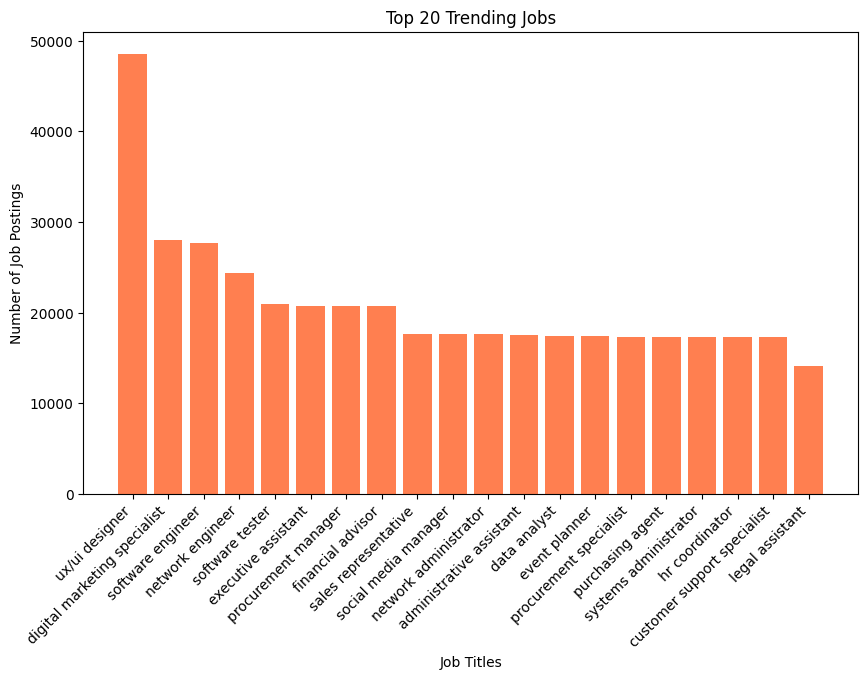

In [25]:
# Convert the PySpark DataFrame to Pandas for visualization
job_trends_pd = job_trends.limit(20).toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(job_trends_pd["Job Title"], job_trends_pd["count"], color='coral')
plt.xlabel("Job Titles")
plt.ylabel("Number of Job Postings")
plt.title("Top 20 Trending Jobs")
plt.xticks(rotation=45, ha='right')
plt.show()



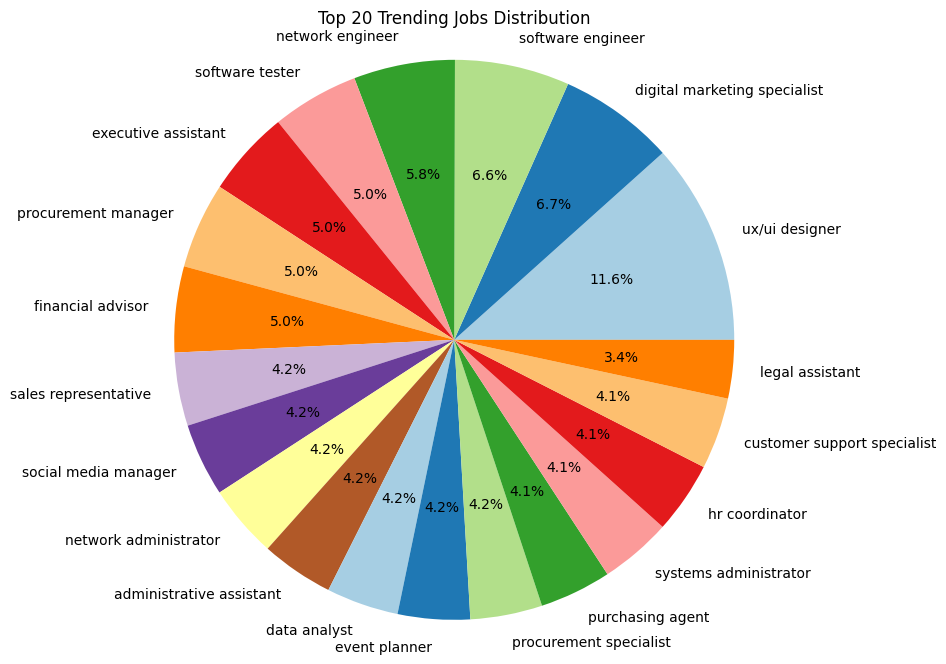

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(job_trends_pd["count"], labels=job_trends_pd["Job Title"], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Top 20 Trending Jobs Distribution")
plt.axis('equal')
plt.show()
